In [50]:

import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('sonar3.csv', delim_whitespace=True, header=None, index_col=False)
data = df

X = data.iloc[:, 0:3].values

y = data.iloc[:, 3].values

 
#encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

 
# convert into PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
 
# create DataLoader, then take one batch
loader = DataLoader(list(zip(X,y)), shuffle=True, batch_size=len(X_train))
for X_batch, y_batch in loader:
    print(X_batch, y_batch)
    break

tensor([[1.7593, 1.7011, 1.3506],
        [2.2408, 1.2861, 1.0230],
        [1.3259, 1.4201, 1.1409],
        ...,
        [2.9162, 1.1298, 1.0319],
        [1.9019, 1.3034, 1.6625],
        [1.9321, 1.5621, 0.9012]]) tensor([[1.],
        [1.],
        [2.],
        ...,
        [1.],
        [1.],
        [1.]])


In [52]:
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
 
# train-test split for evaluation of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
 
# set up DataLoader for training set
loader = DataLoader(list(zip(X_train, y_train)), shuffle=True, batch_size=len(X_train))
 
# create model
model = nn.Sequential(
    nn.Linear(3, 3),
    nn.ReLU(),
    nn.Linear(3, 3),
    nn.ReLU(),
    nn.Linear(3, 1),
    nn.Sigmoid()
)
 
# Train the model
n_epochs = 200
loss_fn = nn.BCELoss()
loss_values = []
optimizer = optim.SGD(model.parameters(), lr=0.1)
model.train()
for epoch in range(n_epochs):
    for X_batch, y_batch in loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        
        loss = loss_fn(y_pred, y_batch)
       
        
        
        loss_values.append(loss.item())
        #print(len(loss_values))
        loss.backward()
        optimizer.step()
 
# evaluate accuracy after training
model.eval()
y_pred = model(X_test)
acc = (y_pred.round() == y_test).float().mean()
acc = float(acc)
print("Model accuracy: %.2f%%" % (acc*100))

Model accuracy: 75.60%


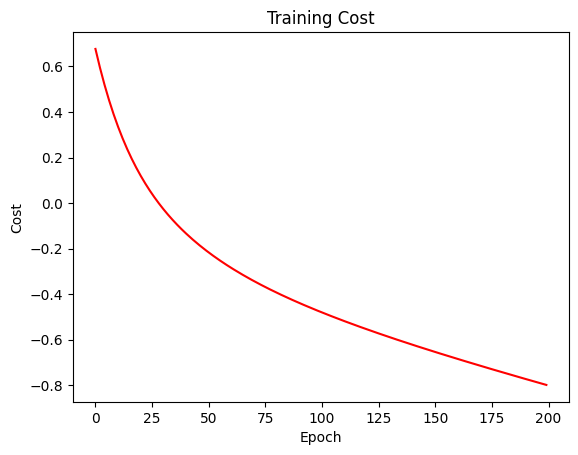

In [53]:

fig, ax = plt.subplots()
ax.set(xlabel='Epoch', ylabel='Cost', title="Training Cost")

plt.plot([x for x in range(n_epochs)], loss_values, 'red')
plt.show()
